# AAPL DCF

## Introduction: 
This file includes a Discounted Cash Flow model for Apple (AAPL) stock with broad assumtions on growth. Theoretically, the basic idea of the DCF model is summarized by my sildes: https://github.com/galamboslajos/Finance-Working-Files/blob/main/DCF_Code/DCF_model.pdf

In [69]:
# Installing necessary packages
#!pip install yfinance
#!pip install yahoo_fin

In [83]:
import yfinance as yf
import yahoo_fin.stock_info as si
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [71]:
# Get the data of the stock AAPL
data = yf.download('AAPL','2016-01-01','2021-12-31')

# Print the first five rows of the data
print(data.head())

[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2016-01-04  25.652500  26.342501  25.500000  26.337500  23.886835  270597600
2016-01-05  26.437500  26.462500  25.602501  25.677500  23.288244  223164000
2016-01-06  25.139999  25.592501  24.967501  25.174999  22.832502  273829600
2016-01-07  24.670000  25.032499  24.107500  24.112499  21.868864  324377600
2016-01-08  24.637501  24.777500  24.190001  24.240000  21.984503  283192000


The chunk above goes to https://finance.yahoo.com/quote/AAPL/ and gets daily share price. The daily share price is not a necessary informtion at this stage, however, later it will be used. All the financials, such as the income statement, cashflows, and the balance sheet is taken from finance.yahoo. 

## The Cashflow:

In [72]:
# Get the cashlfow data
aapl = yf.Ticker("AAPL")

# Get cash flow information
cashflow = aapl.cashflow

# Convert the numbers to billions
cashflow_df_in_billions = cashflow_df / 1e9

print("Apple Cash Flow Data (in Billions):")
print(cashflow_df_in_billions.to_string())

Apple Cash Flow Data (in Billions):
                                               2023-09-30 2022-09-30 2021-09-30 2020-09-30
Free Cash Flow                                     99.584    111.443     92.953     73.365
Repurchase Of Capital Stock                        -77.55    -89.402    -85.971    -72.358
Repayment Of Debt                                 -11.151     -9.543      -8.75    -12.629
Issuance Of Debt                                    5.228      5.465     20.393     16.091
Issuance Of Capital Stock                             NaN        NaN      1.105       0.88
Capital Expenditure                               -10.959    -10.708    -11.085     -7.309
Interest Paid Supplemental Data                     3.803      2.865      2.687      3.002
Income Tax Paid Supplemental Data                  18.679     19.573     25.385      9.501
End Cash Position                                  30.737     24.977     35.929     39.789
Beginning Cash Position                            24.

We see a detailed list of the different cashflow items between 2020 and 2023 in billions of USD. Some entries are empty, giving "NaN". 

## The Income Statement:

In [73]:
# Get the income statement data
income_statement = aapl.financials

# Convert the numbers to billions
income_statement_df_in_billions = income_statement / 1e9

# Print the DataFrame with numbers in billions
print("Apple Income Statement Data (in Billions):")
print(income_statement_df_in_billions.to_string())


Apple Income Statement Data (in Billions):
                                                           2023-09-30 2022-09-30 2021-09-30 2020-09-30
Tax Effect Of Unusual Items                                       0.0        0.0        0.0        0.0
Tax Rate For Calcs                                                0.0        0.0        0.0        0.0
Normalized EBITDA                                             129.188    133.138    123.136      81.02
Net Income From Continuing Operation Net Minority Interest     96.995     99.803      94.68     57.411
Reconciled Depreciation                                        11.519     11.104     11.284     11.056
Reconciled Cost Of Revenue                                    214.137    223.546    212.981    169.559
EBITDA                                                        129.188    133.138    123.136      81.02
EBIT                                                          117.669    122.034    111.852     69.964
Net Interest Income           

Here we see an exhasutive list of the different income related items between 2020 and 2023 in billions of USD. The departure of the Free Cash Flow method is the EBIT (Earnings Before Interest and Tax). 

## Free Cash Flow:
In the following chunks I calculate the Free Cash Flow of AAPL, and I will later label it as Free Cash to Firm. The reason for this is that Free Cash Flow is aslo directly available from finance.yahoo in the cashflow of AAPL and I want to compare wih my caculations. I see  deviation of the provided and calculated numbers. 

In [74]:
# Calculating FCF (Comparing it with the pre-calculated ones Free Cash Flow vs Free Cash Flow to Firm)

# Step 1: Manually set the tax rate (assumed to be 21%)
tax_rate = 0.21

# Access the EBIT row from the income_statement DataFrame
ebit = income_statement.loc['EBIT']

# Calculate EBIT after taxes
ebit_after_taxes = ebit * (1 - tax_rate)

# Step 2: Add back depreciation and amortization (assuming it's a row too)
depreciation_amortization = cashflow.loc['Depreciation And Amortization']

# Step 3: Subtract capital expenditures (also assumed to be a row)
capital_expenditure = cashflow.loc['Capital Expenditure']

# Step 4: Adjust for change in working capital (assumed to be a row)
change_in_working_capital = cashflow.loc['Change In Working Capital']

# Calculate Free Cash Flow (FCF)
free_cash_flow = (
    ebit_after_taxes + 
    depreciation_amortization - 
    capital_expenditure - 
    change_in_working_capital
)

# Add FCF as a new row to the cashflow DataFrame for context
cashflow.loc['Free Cash Flow to Firm'] = free_cash_flow

# Convert the numbers to billions
cashflow_df_in_billions = cashflow / 1e9

print("Apple Cash Flow Data (in Billions):")
print(cashflow_df_in_billions.to_string())

Apple Cash Flow Data (in Billions):
                                               2023-09-30 2022-09-30 2021-09-30 2020-09-30
Free Cash Flow                                     99.584    111.443     92.953     73.365
Repurchase Of Capital Stock                        -77.55    -89.402    -85.971    -72.358
Repayment Of Debt                                 -11.151     -9.543      -8.75    -12.629
Issuance Of Debt                                    5.228      5.465     20.393     16.091
Issuance Of Capital Stock                             NaN        NaN      1.105       0.88
Capital Expenditure                               -10.959    -10.708    -11.085     -7.309
Interest Paid Supplemental Data                     3.803      2.865      2.687      3.002
Income Tax Paid Supplemental Data                  18.679     19.573     25.385      9.501
End Cash Position                                  30.737     24.977     35.929     39.789
Beginning Cash Position                            24.

I append the previous cashflow statement of AAPL with the calculated FCF. The calculated Free Cash Flow is shown in the last row of the data frame, meanwhile the provided ones are in the first row. I see deviations between the two, might be due to different methodologies.

## FCF, FCFE, FCFD
In the following section I provide different Free Cash Flow types: the Free Cash Flow to Equity (FCFE) and Debt (FCFD) holders. I add those also to the cashflow statement of AAPL. 

In [75]:
# Step 1: Access the FCF from the cashflow DataFrame (this is the free cash flow to the firm)
fcf = cashflow.loc['Free Cash Flow']

# Step 2: Calculate Free Cash Flow to Debt Holders (FCFDH)
interest_paid = cashflow.loc['Interest Paid Supplemental Data']
net_debt_repayment = cashflow.loc['Net Issuance Payments Of Debt']

# FCFDH = Interest Paid + Net Debt Repayment (positive or negative depending on issuance or repayment)
fcfdh = interest_paid + net_debt_repayment

# Step 3: Calculate Free Cash Flow to Equity (FCFE)
# FCFE = FCF - FCFDH (because FCFE is the residual after debt holders are paid)
fcfe = fcf - fcfdh

# Step 4: Add the FCFE and FCFDH rows to the cashflow DataFrame for context
cashflow.loc['Free Cash Flow to Equity'] = fcfe
cashflow.loc['Free Cash Flow to Debt Holders'] = fcfdh

# Convert the numbers to billions
cashflow_df_in_billions = cashflow / 1e9

print("Apple Cash Flow Data (in Billions):")
print(cashflow_df_in_billions.to_string())


Apple Cash Flow Data (in Billions):
                                               2023-09-30 2022-09-30 2021-09-30 2020-09-30
Free Cash Flow                                     99.584    111.443     92.953     73.365
Repurchase Of Capital Stock                        -77.55    -89.402    -85.971    -72.358
Repayment Of Debt                                 -11.151     -9.543      -8.75    -12.629
Issuance Of Debt                                    5.228      5.465     20.393     16.091
Issuance Of Capital Stock                             NaN        NaN      1.105       0.88
Capital Expenditure                               -10.959    -10.708    -11.085     -7.309
Interest Paid Supplemental Data                     3.803      2.865      2.687      3.002
Income Tax Paid Supplemental Data                  18.679     19.573     25.385      9.501
End Cash Position                                  30.737     24.977     35.929     39.789
Beginning Cash Position                            24.

We see significantly more cashflows for Equity holders than for Debtors.

## WACC 
The Weighted Average Cost of Capital is a crucial concept that basically takes a weighted average of the cost of debt and equity. The weights are stated by the market value of debt and market value of equity (the two if summed gives the enterpise value). The WACC is crucial for discounting future FCF values. To get to the market value of debt and equity we need to take a look at AAPL's balance sheet.

In [77]:
# Calculating WACC (getting data from the Balance Sheet for the market value of debt and market capitalization)
# Get balance sheet data
balance_sheet = aapl.balance_sheet

# Convert the numbers to billions
balance_sheet_df_in_billions = balance_sheet / 1e9

print("Apple Balance Sheet Data (in Billions):")
print(balance_sheet_df_in_billions.to_string())

Apple Balance Sheet Data (in Billions):
                                                    2023-09-30 2022-09-30 2021-09-30 2020-09-30
Treasury Shares Number                                     0.0        NaN        NaN        NaN
Ordinary Shares Number                               15.550061  15.943425  16.426786  16.976763
Share Issued                                         15.550061  15.943425  16.426786  16.976763
Net Debt                                                81.123     96.423     89.779      74.42
Total Debt                                              123.93     132.48    136.522    122.278
Tangible Book Value                                     62.146     50.672      63.09     65.339
Invested Capital                                       173.234    170.741    187.809    177.775
Working Capital                                         -1.742    -18.577      9.355     38.321
Net Tangible Assets                                     62.146     50.672      63.09     65.339


A long list of AAPL's balance sheet items is provided. The attention must go to debt related items (short and long term); and for the market value of equity the market capitalization is needed. The following chunk does exactly that and finalizes the WACC calculation by calculation the cost of equity with the CAPM method:

## WACC (cont.) 

In [81]:
# WACC
# Market capitalization (in dollars)
market_cap = aapl.info['marketCap']

# Step 1: Extract relevant financial data from balance sheet and cash flow
long_term_debt_label = 'Long Term Debt'
short_term_debt_label = 'Current Debt'

long_term_debt = balance_sheet.loc[long_term_debt_label][0] if long_term_debt_label in balance_sheet.index else 0
short_term_debt = balance_sheet.loc[short_term_debt_label][0] if short_term_debt_label in balance_sheet.index else 0

# Calculate total debt
total_debt = long_term_debt + short_term_debt

# Interest paid from cash flow statement
interest_paid = cashflow.loc['Interest Paid Supplemental Data'][0]

# Step 2: Cost of Equity (CAPM formula)
risk_free_rate = 0.03  # Example: 3% risk-free rate
market_risk_premium = 0.055  # Example: 5% market risk premium
beta = 1.2  # Assumed beta for Apple

cost_of_equity = risk_free_rate + beta * market_risk_premium
print(f"Cost of Equity: {cost_of_equity * 100:.2f}%")

# Step 3: Cost of Debt
cost_of_debt = interest_paid / total_debt if total_debt > 0 else 0
print(f"Cost of Debt: {cost_of_debt * 100:.2f}%")

# Step 4: Weights of Debt and Equity
total_capital = market_cap + total_debt
weight_of_equity = market_cap / total_capital
weight_of_debt = total_debt / total_capital
print(f"Weight of Equity: {weight_of_equity * 100:.2f}%")
print(f"Weight of Debt: {weight_of_debt * 100:.2f}%")

# Step 5: Corporate Tax Rate
corporate_tax_rate = 0.21  # Assume 21% tax rate

# Step 6: WACC Calculation
wacc = (weight_of_equity * cost_of_equity) + (weight_of_debt * cost_of_debt * (1 - corporate_tax_rate))

# Display the WACC
print(f"Weighted Average Cost of Capital (WACC): {wacc * 100:.2f}%")

Cost of Equity: 9.60%
Cost of Debt: 3.42%
Weight of Equity: 96.85%
Weight of Debt: 3.15%
Weighted Average Cost of Capital (WACC): 9.38%


Here it is confirmed again, that the cost of capital is heavily biased towards equity (96.85% of the weight).

## Terminal Value and Growth Rate:
First, a growth rate between previous years' FCF is calculated, than applied for the next 5 year period. After that, the terminal value is calculated (a perpetuity) with an assumed growth rate. 

In [96]:
# Retrieve historical Free Cash Flow (FCF) data for calculating growth rates
historical_fcfs = cashflow.loc['Free Cash Flow']

# Reverse the order of the FCFs to ensure we're calculating growth in the correct direction (oldest to newest)
historical_fcfs = historical_fcfs[::-1]  # Reverse the order of FCFs

# Calculate average annual growth rate based on historical FCFs
historical_growth_rates = []
for i in range(1, len(historical_fcfs)):
    growth_rate = (historical_fcfs[i] - historical_fcfs[i - 1]) / historical_fcfs[i - 1]
    historical_growth_rates.append(growth_rate)


# Average growth rate over the historical period
avg_growth_rate = np.mean(historical_growth_rates)


# Project future FCFs using the calculated average growth rate over the forecast period
forecast_years = 5  # Forecast period
initial_fcf = historical_fcfs[-1]  # Use the most recent FCF as the starting point (now last after reversing)

# Project future FCFs over the forecast period
future_fcfs = [initial_fcf * (1 + avg_growth_rate) ** year for year in range(1, forecast_years + 1)]

# Convert the projected FCFs to billions
future_fcfs_in_billions = [fcf / 1e9 for fcf in future_fcfs]

print(f"Average Growth Rate: {avg_growth_rate * 100:.2f}%")

# Display the projected FCFs for each year
print("Projected Future Free Cash Flows (based on historical average growth rate, in billions):")
for i, fcf in enumerate(future_fcfs_in_billions, 1):
    print(f"Year {i}: {fcf:.2f} billion")


# Get the final year FCF for terminal value calculation (FCF_n)
final_year_fcf = future_fcfs[-1]

# Manually set perpetual growth rate for terminal value
terminal_growth_rate = 0.05  # Example: 5% perpetual growth rate

# Calculate Terminal Value using the manually set perpetual growth rate
terminal_value = (final_year_fcf * (1 + terminal_growth_rate)) / (wacc - terminal_growth_rate)

# Convert the Terminal Value to billions
terminal_value_in_billions = terminal_value / 1e9

# Display the Terminal Value
print(f"\nTerminal Value (in billions): {terminal_value_in_billions:.2f} billion")
print("Assumed Terminal Growth Rate of 5%")



Average Growth Rate: 11.98%
Projected Future Free Cash Flows (based on historical average growth rate, in billions):
Year 1: 111.52 billion
Year 2: 124.88 billion
Year 3: 139.85 billion
Year 4: 156.60 billion
Year 5: 175.37 billion

Terminal Value (in billions): 4201.29 billion
Assumed Terminal Growth Rate of 5%


## Discounting the Projected FCFs to Pesent Value: 
Now, as the future FCFs are calculated, the golden rule of finance is applied: discountion back to present value to make them additive. Once the discounted FCFs are discounted, and summed, we arrive at the enterprise value.  

In [97]:
# Discount the projected FCFs to the present value
discounted_fcfs = [fcf / (1 + wacc) ** year for year, fcf in enumerate(future_fcfs, start=1)]

# Discount the Terminal Value to the present value
discounted_terminal_value = terminal_value / (1 + wacc) ** forecast_years

# Convert discounted values to billions
discounted_fcfs_in_billions = [fcf / 1e9 for fcf in discounted_fcfs]
discounted_terminal_value_in_billions = discounted_terminal_value / 1e9

# Display the discounted FCFs for each year
print("Discounted Future Free Cash Flows (in billions):")
for i, fcf in enumerate(discounted_fcfs_in_billions, 1):
    print(f"Year {i}: {fcf:.2f} billion")

# Display the discounted Terminal Value
print(f"\nDiscounted Terminal Value (in billions): {discounted_terminal_value_in_billions:.2f} billion")

# Sum up the discounted FCFs and Terminal Value to get the Enterprise Value
enterprise_value = sum(discounted_fcfs) + discounted_terminal_value
enterprise_value_in_billions = enterprise_value / 1e9

# Display the Enterprise Value
print(f"\nEnterprise Value (in billions): {enterprise_value_in_billions:.2f} billion")



Discounted Future Free Cash Flows (in billions):
Year 1: 101.95 billion
Year 2: 104.38 billion
Year 3: 106.86 billion
Year 4: 109.40 billion
Year 5: 112.00 billion

Discounted Terminal Value (in billions): 2683.09 billion

Enterprise Value (in billions): 3217.67 billion


## Arriving at the Implied Share Price
Since the enetrprise value, by definition, consists of the market value of debt and equity, once the market value of debt is known, the market value of equity can be calculated. If the latter is divided by the number of shares outstanding, we arrive at the implied share price. 

In [107]:
# Implied share price
# Retrieve cash and number of shares from yfinance
cash = balance_sheet.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in balance_sheet.index else 0
number_of_shares = aapl.info['sharesOutstanding']

# Calculate Net Debt (Total Debt - Cash)
net_debt = total_debt - cash

# Equity Value = Enterprise Value - Net Debt
equity_value = enterprise_value - net_debt  

# Calculate Implied Share Price
implied_share_price = equity_value / number_of_shares

# Display the results
print(f"\nEnterprise Value (in billions): {enterprise_value_in_billions:.2f} billion")
print(f"Net Debt: {(net_debt/1e9):.2f} billion")
print(f"Equity Value: {(equity_value/1e9):.2f} billion")
print(f"Number of Shares Outstanding: {number_of_shares}")
print(f"Implied Share Price: {implied_share_price:.2f} $/share")


Enterprise Value (in billions): 3217.67 billion
Net Debt: 81.12 billion
Equity Value: 3136.54 billion
Number of Shares Outstanding: 15204100096
Implied Share Price: 206.30 $/share


## Plotting the Actual and Implied Share Prices

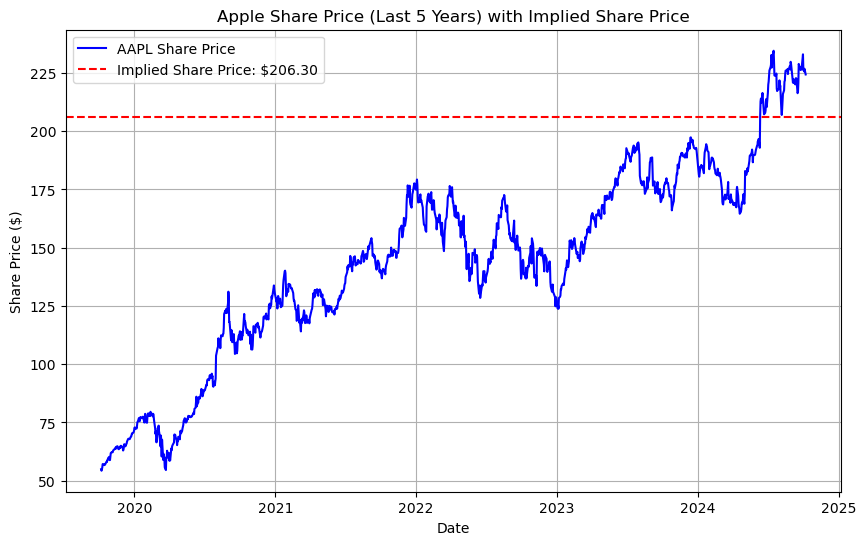

In [108]:
# Plotting the actual vs implied stock rpice
# Retrieve historical stock data for AAPL over the last 5 years
aapl = yf.Ticker("AAPL")
historical_data = aapl.history(period="5y")

# Extract the 'Close' price for the plot
close_prices = historical_data['Close']

# Generate a date range for the last 5 years
dates = historical_data.index

# Plot the historical share price
plt.figure(figsize=(10, 6))
plt.plot(dates, close_prices, label='AAPL Share Price', color='blue')

# Add a dashed line for the implied share price
plt.axhline(implied_share_price, color='red', linestyle='--', label=f'Implied Share Price: ${implied_share_price:.2f}')

# Add labels, title, and legend
plt.title("Apple Share Price (Last 5 Years) with Implied Share Price")
plt.xlabel("Date")
plt.ylabel("Share Price ($)")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
